# Assignment 0

Objective of this assignment is to give an overview of working with PyTorch to train, test and save your model.

In [1]:
from __future__ import division, print_function, unicode_literals 
import torch
import torchvision
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

Check if gpu support is available to PyTorch

In [2]:
torch.cuda.is_available()

True

In [3]:
# use GPU
use_gpu = False

Hyperparameters are like knobs and buttons to your network. You can tweak them, change their value and see how your netowrk is responding. Tweaking some hyperparameters takes skill and intuition. This is what makes ML part art and part science.

It's always a good idea to define all your hyperparameters at one place.

In [4]:
# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### Loading MNIST dataset

The MNIST dataset is downloaded from internet and cached locally. The first time you run this block, it will take time to download the dataset. The dataset is saved in `datasets` directory.

In [5]:
train_dataset = dsets.MNIST(root='./datasets', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='./datasets', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Let's see one batch of training images and test images. Notice what happens if you change the value of `batch_size` hyperparameter.

In [6]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Test images


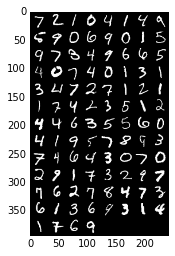

In [7]:
test_dataiter = iter(test_loader)
test_images, test_labels = test_dataiter.next()
# print images
print("Test images")
imshow(torchvision.utils.make_grid(test_images))

Train images


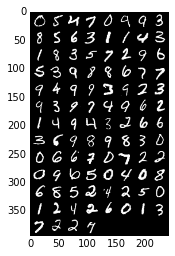

In [8]:
train_dataiter = iter(train_loader)
train_images, train_labels = train_dataiter.next()

print("Train images")
imshow(torchvision.utils.make_grid(train_images))

### Network model

Here we define a small network model, which gives ~97% accuracy on MNIST dataset. <br>

The network takes input a vector of size `input_size`. In case of MNIST dataset, the input size is 784. The output of the network is again a vector of size `num_classes` which gives the scores for various classes of the MNIST dataset.

In [9]:
# Neural Network Model (1 hidden layer)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
#         print (x.size())
        out = self.relu(out)
        print (out.size())
        out = self.fc2(out)
        print (out.size())
        return out
    

Here we define an instance of the network that we defined above. Observe that it is here, while creating the object `net` that we supply the desired input, hidden_layer size and the number of output classes.

In [10]:
net = Net(input_size, hidden_size, num_classes)

If gpu support is enabled, then we want to transfer the network object to gpu to handle gpu objects. It's scary to read the first time, but it will be normal once you start training your networks everyday.

In [11]:
if(torch.cuda.is_available() and use_gpu):
    net.cuda()

Deep learning related stuff. If you don't understand, don't panic.

In [12]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

### Train the model

Training the model means that we are going to show our network a bunch of images and tell the correct class for the image. After showing the whole "training" dataset for a couple of times, we expect our network to have learned to classify a given image of similar type. <br>
We will then "test" our model on a different set of images, which were not shown to the network while training.

In [13]:
def train():
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # Convert torch tensor to Variable
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            if(use_gpu):
                images=images.cuda()
                labels=labels.cuda()
            # Forward + Backward + Optimize
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if (i+1) % 100 == 0:
                print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                       %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

One epoch means the network has been shown the complete dataset once. Generally, training involves showing the network the entire training dataset a couple of times.

Here, you should change the value of `use_gpu` to see the difference in training time. You will notice a speed up of atleast 50% when using gpu.

In [14]:
%time train()

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
Epoch [1/5], Step [200/600], Loss: 0.3633
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([1

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
Epoch [4/5], Step [100/600], Loss: 0.0800
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([1

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

### Test the model

We now test the trained model on our "test" dataset. Important thing to note is that the network has not seen any image from the test dataset during training.

In [15]:
def test(model):
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        
        if(use_gpu):
            images = images.cuda()
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels.cpu()).sum()
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

In [16]:
%time test(net)

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

### Saving the trained model

Since you have spent a lot of effort to train an excellent classifier with ~97% accuracy, its good to save it in case you need it in future. Saving the model time to time during training is also a good idea.

In [17]:
torch.save(net.state_dict(), 'assignment0_model.pkl')

### Loading the saved model

Here, we will create a new instance of our network. We will first test it without training and then load the trained parameters from the disk and test it again.

In [18]:
# create an instance of the model
net_1 = Net(input_size, hidden_size, num_classes)

# check if gpu is enabled
if(torch.cuda.is_available() and use_gpu):
    net_1.cuda()

In [19]:
%time test(net_1)

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size

Since the new network was not trained on our dataset, it was producing random output. The accuracy shown above is the `chance` output that you will get on this dataset without any training. Thus, anything better than this is a proof that whatever technique you are using is working and the network is learning to classify the images.

In [20]:
# load the trained parameter values from the disk
net_1.load_state_dict(torch.load('assignment0_model.pkl'))
# test the model
%time test(net_1)

torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size([100, 500])
torch.Size([100, 10])
torch.Size